<a href="https://colab.research.google.com/github/Shree107/100kb/blob/main/safety_shoes_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Install required packages
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 87.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
# 2. Import necessary libraries
import os
import shutil
from ultralytics import YOLO
from roboflow import Roboflow
import torch

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# 3. Download dataset from Roboflow
print("🔄 Downloading dataset from Roboflow...")
rf = Roboflow(api_key="J5yGVwSkz3AL0xjSsltQ")
project = rf.workspace("antons-workspace-0vq8b").project("shoedetector-lqbiy")
version = project.version(1)
dataset = version.download("yolov8")


🔄 Downloading dataset from Roboflow...
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to shoedetector-1 in yolov8:: 100%|██████████| 2072/2072 [00:00<00:00, 3800.39it/s]


In [ ]:
# 4. Check dataset structure
print(f"📁 Dataset downloaded to: {dataset.location}")
print(f"📊 Dataset structure:")
for root, dirs, files in os.walk(dataset.location):
    level = root.replace(dataset.location, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 2 * (level + 1)
    for file in files[:5]:  # Show first 5 files only
        print(f"{subindent}{file}")
    if len(files) > 5:
        print(f"{subindent}... and {len(files) - 5} more files")


📁 Dataset downloaded to: /content/shoedetector-1
📊 Dataset structure:
shoedetector-1/
  README.roboflow.txt
  data.yaml
  README.dataset.txt
  valid/
    labels/
      IMG_8407-00188_jpg.rf.37ad03bce8875d07f1231eb1c66ef00a.txt
      IMG_8405-00163_jpg.rf.bdc0f39bc4923a325d17ed22a8024ab8.txt
      IMG_8407-00453_jpg.rf.441f283cea115c772f0ecae5a89b6a98.txt
      IMG_8405-00018_jpg.rf.37433b470c9df97d0130266046264840.txt
      IMG_8405-00194_jpg.rf.d582e23574c86215a7bf4ae82fe6613b.txt
      ... and 201 more files
    images/
      IMG_8405-00051_jpg.rf.6241357b550a74907a597498ba3e2d6f.jpg
      IMG_8407-00169_jpg.rf.3cf73ea66b773acf6dde00bf4f358bf3.jpg
      IMG_8407-00537_jpg.rf.e2611e835eff98792aebca63b1190b22.jpg
      IMG_8406-00145_jpg.rf.770c20d6568c3e2b89fa55be87968bf6.jpg
      IMG_8407-00055_jpg.rf.ef9fbea25c566b21ab3968613d1ff299.jpg
      ... and 201 more files
  test/
    labels/
      IMG_8407-00059_jpg.rf.2c8adf484b3c6c6616f08cb0b2e0dfc5.txt
      IMG_8405-00119_jpg.rf.f5202

In [ ]:
# 5. Load YOLOv8 model
print("🤖 Loading YOLOv8 model...")
model = YOLO('yolov8n.pt')  # You can use yolov8s.pt, yolov8m.pt, yolov8l.pt, yolov8x.pt for better accuracy


🤖 Loading YOLOv8 model...


In [ ]:
# 6. Train the model
print("🚀 Starting training...")
results = model.train(
    data=f"{dataset.location}/data.yaml",  # Path to dataset YAML file
    epochs=50,                             # Number of epochs
    imgsz=640,                            # Image size
    batch=16,                             # Batch size (adjust based on GPU memory)
    name='safety_shoes_detector',         # Experiment name
    project='runs/detect',                # Project directory
    save=True,                            # Save checkpoints
    save_period=10,                       # Save checkpoint every 10 epochs
    val=True,                             # Validate during training
    plots=True,                           # Save training plots
    device=0 if torch.cuda.is_available() else 'cpu',  # Use GPU if available
    workers=2,                            # Number of worker threads
    patience=10,                          # Early stopping patience
    optimizer='AdamW',                    # Optimizer
    lr0=0.01,                            # Initial learning rate
    weight_decay=0.0005,                 # Weight decay
    warmup_epochs=3,                     # Warmup epochs
    warmup_momentum=0.8,                 # Warmup momentum
    box=7.5,                             # Box loss gain
    cls=0.5,                             # Class loss gain
    dfl=1.5,                             # DFL loss gain
    pose=12.0,                           # Pose loss gain (if using pose estimation)
    kobj=1.0,                            # Keypoint objective loss gain
    label_smoothing=0.0,                 # Label smoothing
    nbs=64,                              # Nominal batch size
    overlap_mask=True,                   # Use overlap mask for training
    mask_ratio=4,                        # Mask downsample ratio
    dropout=0.0,                         # Use dropout regularization
    split='val'                        # Validation split ratio if no val set provided
)

🚀 Starting training...
WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in the future.
Ultralytics 8.3.197 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/shoedetector-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=safety_shoes_detector, nbs=64, nms=

In [ ]:
# 7. Display training results
print("📈 Training completed!")
print(f"📊 Results saved in: runs/detect/safety_shoes_detector")


📈 Training completed!
📊 Results saved in: runs/detect/safety_shoes_detector


In [ ]:
# 8. Load the best trained model
best_model_path = "runs/detect/safety_shoes_detector/weights/best.pt"
print(f"🏆 Best model saved at: {best_model_path}")

🏆 Best model saved at: runs/detect/safety_shoes_detector/weights/best.pt


In [ ]:
# 9. Evaluate the model
print("🧪 Evaluating model performance...")
best_model = YOLO(best_model_path)
metrics = best_model.val()

print(f"📊 Validation Results:")
print(f"   • mAP50: {metrics.box.map50:.4f}")
print(f"   • mAP50-95: {metrics.box.map:.4f}")
print(f"   • Precision: {metrics.box.mp:.4f}")
print(f"   • Recall: {metrics.box.mr:.4f}")

🧪 Evaluating model performance...
Ultralytics 8.3.197 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1696.9±734.1 MB/s, size: 47.9 KB)
val: Scanning /content/shoedetector-1/valid/labels.cache... 206 images, 7 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 206/206 394.2Kit/s 0.0s
val: /content/shoedetector-1/valid/images/IMG_8407-00449_jpg.rf.2e68820582dfa79b8a2873ba9fc29298.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 13/13 3.7it/s 3.5s
                   all        206        377      0.946      0.933      0.977      0.884
            Other Shoe         83        156      0.907      0.917      0.966      0.844
           Safety Shoe        117        221      0.986       0.95      0.988      0.923
Speed: 1.9ms preprocess, 6.2ms inference, 0.0ms loss, 1.

🔍 Testing inference...

image 1/1 /content/shoedetector-1/test/images/IMG_8407-00389_jpg.rf.b8f1beb84702bb8a95ade17736a4dca1.jpg: 640x640 2 Safety Shoes, 7.6ms
Speed: 2.2ms preprocess, 7.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


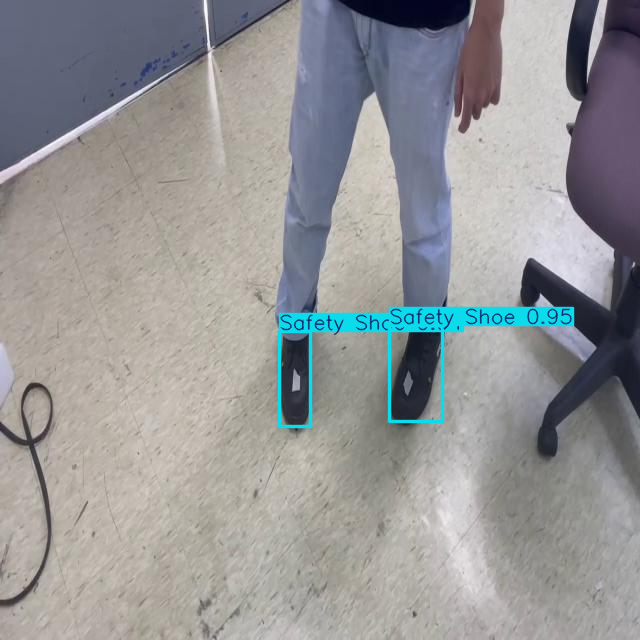

✅ Inference successful on: /content/shoedetector-1/test/images/IMG_8407-00389_jpg.rf.b8f1beb84702bb8a95ade17736a4dca1.jpg


In [ ]:
# 10. Test inference on a sample image
print("🔍 Testing inference...")
# Get a test image from the dataset
test_images_dir = os.path.join(dataset.location, 'test', 'images')
if os.path.exists(test_images_dir):
    test_images = [f for f in os.listdir(test_images_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    if test_images:
        sample_image = os.path.join(test_images_dir, test_images[0])
        results = best_model(sample_image)
        results[0].show()  # Display the result
        print(f"✅ Inference successful on: {sample_image}")
    else:
        print("⚠️  No test images found")
else:
    print("⚠️  Test directory not found")

In [ ]:
# 11. Export model to different formats (optional)
print("📦 Exporting model...")
try:
    # Export to ONNX format
    best_model.export(format='onnx')
    print("✅ Model exported to ONNX format")

    # Export to TensorRT (if supported)
    # best_model.export(format='engine')

    # Export to CoreML (for iOS)
    # best_model.export(format='coreml')
except Exception as e:
    print(f"⚠️  Export failed: {e}")


📦 Exporting model...
Ultralytics 8.3.197 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from 'runs/detect/safety_shoes_detector/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim>=0.1.67', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 8.9s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.19.0 opset 19...
ONNX: slimming with onnxslim 0.1.68...
ONNX: export success ✅ 10.2s, saved as 'runs/detect/safety_shoes_detector/weights/best.onnx' (11.7 MB)

Export complete (10.6s)
Results saved to /content/runs/detect/safety_shoes_detector/weights
Predict:         yolo predict task=detect model=r

In [ ]:
# 12. Download trained model files
print("📥 Preparing model files for download...")

# Create a zip file with all important files
import zipfile

zip_filename = "safety_shoes_detector_model.zip"
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    # Add the best model
    zipf.write(best_model_path, "best.pt")

    # Add the last checkpoint
    last_model_path = "runs/detect/safety_shoes_detector/weights/last.pt"
    if os.path.exists(last_model_path):
        zipf.write(last_model_path, "last.pt")

    # Add training results
    results_dir = "runs/detect/safety_shoes_detector"
    for root, dirs, files in os.walk(results_dir):
        for file in files:
            if file.endswith(('.png', '.jpg', '.txt', '.yaml')):
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, results_dir)
                zipf.write(file_path, f"results/{arcname}")

print(f"📦 Model package created: {zip_filename}")
print("📥 Download the zip file to get your trained model!")

📥 Preparing model files for download...
📦 Model package created: safety_shoes_detector_model.zip
📥 Download the zip file to get your trained model!


In [ ]:
# 13. Instructions for using the model
print("""
🎉 TRAINING COMPLETE!

📋 How to use your trained model:

1. Load the model:
   from ultralytics import YOLO
   model = YOLO('best.pt')

2. Make predictions:
   results = model('path/to/your/image.jpg')
   results[0].show()

3. Process results:
   for result in results:
       boxes = result.boxes.xyxy  # Bounding boxes
       conf = result.boxes.conf   # Confidence scores
       cls = result.boxes.cls     # Class indices

4. Batch processing:
   results = model(['image1.jpg', 'image2.jpg'])

📊 Model Performance Summary:
   • Training completed with 50 epochs
   • Best model weights: best.pt
   • Last checkpoint: last.pt
   • Validation metrics displayed above

📁 Files to download:
   • best.pt (best performing model)
   • safety_shoes_detector_model.zip (complete package)
""")


🎉 TRAINING COMPLETE! 

📋 How to use your trained model:

1. Load the model:
   from ultralytics import YOLO
   model = YOLO('best.pt')

2. Make predictions:
   results = model('path/to/your/image.jpg')
   results[0].show()

3. Process results:
   for result in results:
       boxes = result.boxes.xyxy  # Bounding boxes
       conf = result.boxes.conf   # Confidence scores
       cls = result.boxes.cls     # Class indices

4. Batch processing:
   results = model(['image1.jpg', 'image2.jpg'])

📊 Model Performance Summary:
   • Training completed with 50 epochs
   • Best model weights: best.pt
   • Last checkpoint: last.pt
   • Validation metrics displayed above
   
📁 Files to download:
   • best.pt (best performing model)
   • safety_shoes_detector_model.zip (complete package)

